In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import spatial


In [2]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel(r'giallozaferano_dataset.xlsx')

In [4]:
df.head(5)

,url,title,cost,category,imageURL,description,prepTime,cookTime,totalTime,yield,...,fibers,cholesterol,sodium,ingredients_measure,ingredients,instructions,bestRating,ratingCount,ratingValue,difficulty
0,https://ricette.giallozafferano.it/Pancakes-al...,Pancakes with dacere syrup,Molto basso,Dolci,https://www.giallozafferano.it/images/ricette/...,"Making pancakes at home is very simple, you ne...",PT15M,PT20M,PT35M,4,...,0.9,117.0,63.0,"[Butter 25g, Flour 00 125g, Medium Eggs 2, Fre...","[Butter, Flour 00, Eggs, Whole Milk, Baking Po...",Iniziamo la preparazione dei pancake fondendo ...,5.0,736.0,4.4,Molto facile
1,https://ricette.giallozafferano.it/Tiramisu.html,Tiramisu,Medio,Dolci,https://www.giallozafferano.it/images/ricette/...,Tiramisu is definitely one of the most delicio...,PT40M,PTM,PT40M,8,...,1.4,259.0,151.0,"[Savoiardi 300g, Fresh eggs (about 4 medium) 2...","[Savoiardi, Eggs, Mascarpone, Sugar, Coffee, C...",Per preparare il tiramisÃ¹ cominciate dalle uo...,5.0,1055.0,4.2,Facile
2,https://ricette.giallozafferano.it/Crepes-dolc...,Sweet and salty crepes (basic recipe),Basso,Dolci,https://www.giallozafferano.it/images/ricette/...,Thanks to the basic dough of sweet and salty c...,PT10M,PT15M,PT25M,8,...,0.8,83.0,56.0,"[Medium eggs 3, Flour 00 250g, Whole milk 500m...","[Eggs, Flour 00, Whole Milk, Butter]",Per preparare le crepe dolci e salate iniziate...,5.0,381.0,4.2,Facile
3,https://ricette.giallozafferano.it/Spaghetti-a...,Spaghetti carbonara,Basso,Primi piatti,https://www.giallozafferano.it/images/ricette/...,The recipe for spaghetti carbonara is typical ...,PT15M,PT10M,PT25M,4,...,2.2,383.0,586.0,"[Spaghetti 320 g, Cheek 150g, Medium Egg Yolks...","[Spaghetti, Guanciale, Yolks, Roman Pecorino, ...",Per preparare gli spaghetti alla carbonara com...,5.0,854.0,4.2,Facile
4,https://ricette.giallozafferano.it/Impasto-per...,Pasta for pizza,Molto basso,Lievitati,https://www.giallozafferano.it/images/ricette/...,The dough for pizza is a basic preparation mad...,PT20M,PTM,PT20M,2,...,6.3,NaN,1966.0,"[Farina Manitoba 200g, Flour 00 300g, Water at...","[Farina Manitoba, Flour 00, Water, ""Extra Virg...",Per preparare la pasta per la pizza abbiamo sc...,5.0,367.0,4.2,Facile


In [5]:
df["ratingCount"]

0        736.0
1       1055.0
2        381.0
3        854.0
4        367.0
         ...  
4636       2.0
4637      25.0
4638       1.0
4639       6.0
4640       1.0
Name: ratingCount, Length: 4641, dtype: float64

# Pre-processing

# Check column datatypes

In [6]:
df.dtypes

url                     object
title                   object
cost                    object
category                object
imageURL                object
description             object
prepTime                object
cookTime                object
totalTime               object
yield                    int64
isVegetarian             int64
isLactoseFree            int64
isGlutenFree             int64
isLight                  int64
isLowNickel              int64
calories               float64
carbohydrates          float64
sugars                 float64
proteins               float64
fat                    float64
saturatedFat           float64
fibers                 float64
cholesterol            float64
sodium                 float64
ingredients_measure     object
ingredients             object
instructions            object
bestRating             float64
ratingCount            float64
ratingValue            float64
difficulty              object
dtype: object

In [7]:
df.difficulty.unique()

array(['Molto facile', 'Facile', 'Media', 'Difficile', 'Molto difficile',
       nan], dtype=object)

# Convert columns to appropriate DataTypes

In [8]:
cost_cat_dic = {
    'Molto basso': '1',
    'Basso': '2',
    'Medio': '3',
    'Elevato': '4',
    'Molto elevata': '5'
}

diff_cat_dic = {
    'Molto facile': '1',
    'Facile': '2',
    'Media' : '3',
    'Difficile': '4',
    'Molto difficile': '5'
}

df.replace({"cost": cost_cat_dic}, inplace=True)
df.replace({"difficulty": diff_cat_dic}, inplace=True)

In [9]:
df.difficulty.head()

0    1
1    2
2    2
3    2
4    2
Name: difficulty, dtype: object

In [10]:
# Remove non-numeric values and convert totalTime to integer datatype. 
df["totalTime"] = df["totalTime"].str.extract('(\d+)', expand=False)
df["totalTime"] = pd.to_numeric(df["totalTime"], errors="coerce")
df["ratingCount"] = pd.to_numeric(df["ratingCount"], errors="coerce")

# Remove non-numeric values and convert prepTime & cookTime to integer datatype. 
df["cookTime"] = df["cookTime"].str.extract('(\d+)', expand=False)
df["prepTime"] = df["prepTime"].str.extract('(\d+)', expand=False)
df["cookTime"] = pd.to_numeric(df["cookTime"], errors="coerce")
df["prepTime"] = pd.to_numeric(df["prepTime"], errors="coerce")

# Converting cost text categories in to numbers and performing numeric conversion on column
df["cost"] = pd.to_numeric(df["cost"], errors="coerce")
df["difficulty"] = pd.to_numeric(df["difficulty"], errors="coerce")

In [11]:
df.cost.dtype

dtype('float64')

# Drop columns not needed for recommendation

In [12]:
del df["bestRating"] # Servers us no real as it only takes one rating to make a max

# Check for NaN values in DF & Visualization

In [13]:
# Displaying what percentage of data is non-values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column': df.columns,
                                'percent_missing':percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column,percent_missing
url,url,0.000000
ingredients,ingredients,0.000000
ingredients_measure,ingredients_measure,0.000000
isLight,isLight,0.000000
isGlutenFree,isGlutenFree,0.000000
isLactoseFree,isLactoseFree,0.000000
isVegetarian,isVegetarian,0.000000
yield,yield,0.000000
isLowNickel,isLowNickel,0.000000
description,description,0.000000


<Figure size 720x432 with 0 Axes>

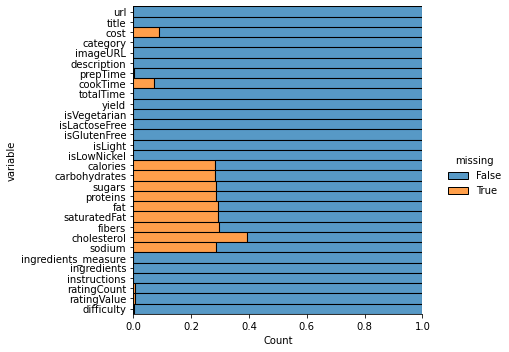

In [14]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

# Handling NaN values. 

In [15]:
# Dropping all rows with NaN values from cost column is NaN values or inaccurate values
# devalues the whole point of the recommendation, 
df = df.dropna(subset=["cost"])

# Replacing all missing values with 0 and use the value 0
# as a mark to state that the amount of that certain feature is unknown
df["cholesterol"].fillna(0, inplace=True)
df["fibers"].fillna(0, inplace=True)
df["fat"].fillna(0, inplace=True)
df["saturatedFat"].fillna(0, inplace=True)
df["sodium"].fillna(0, inplace=True)
df["saturatedFat"].fillna(0, inplace=True)
df["proteins"].fillna(0, inplace=True)
df["sugars"].fillna(0, inplace=True)
df["carbohydrates"].fillna(0, inplace=True)
df["calories"].fillna(0, inplace=True)

# Visualizing NaN values after pre-processing

<Figure size 720x432 with 0 Axes>

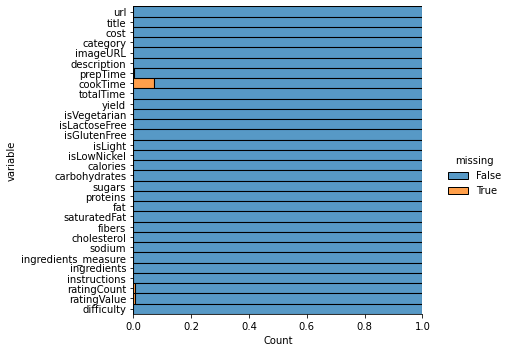

In [16]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

# KRecSys chart builder (Price ONLY)

In [17]:
def rec_chart_builder(gen_df, percentile=0.5):
    # asking for preferred price range
    print("""On a scale from 1-5, how expensive should the food be.
    \n1: Very cheap \n2: Cheap \n3: Okay \n4: Expensive 5:
    Very Expensive""")
    price = int(input())
    while price < 1 & price > 5:
        print("""On a scale from 1-5, how expensive should the food be.
        \n1: Very cheap \n2: Cheap \n3: Okay \n4: Expensive 5:
        Very Expensive""")
        price = int(input())
    
    recipes = gen_df.copy()
    
    recipes = recipes[recipes['cost'] <= price]
    
    c = recipes["cost"].mean()
    m = recipes["ratingValue"].quantile(percentile)
    
    q_recipes = recipes.copy().loc[recipes["ratingValue"] >= m]
    
    q_recipes["score"] = q_recipes.apply(lambda x: (x['ratingValue']/(x['ratingValue']+m) * x['cost'])
                                + (m/(m+x['ratingValue']) * c)
                                ,axis=1)
    
    q_recipes.head()
    
    q_recipes.sort_values('score', ascending=False)
    
    return q_recipes

In [18]:
rec_items = rec_chart_builder(df)

On a scale from 1-5, how expensive should the food be.
    
1: Very cheap 
2: Cheap 
3: Okay 
4: Expensive 5:
    Very Expensive
1


In [19]:
visualized = rec_items.loc[:, ["cost", "title", "ratingValue"]]
visualized.head(5)

,cost,title,ratingValue
0,1.0,Pancakes with dacere syrup,4.4
4,1.0,Pasta for pizza,4.2
13,1.0,BÃ©chamel,4.3
19,1.0,Coffee cream,4.3
33,1.0,Piadina Romagnola,4.3


# RecSys Chartbuilder (All planned features)

In [20]:
def rec_sys_all(gen_df, percentile=0.8):
    # TODO: Ask for a price range
    price = int(input())
    # TODO: Ask for preferred time spent
    maxTimeSpent = int(input())
    # TODO: preferred difficulty
    maxPrefDiff = int(input())
    
    
    recipes = gen_df.copy()
    
    recipes = recipes[(recipes['cost'] <= price) &
                     (recipes['totalTime'] <= maxTimeSpent) &
                     (recipes['difficulty'] <= maxPrefDiff)]
    
    c = recipes["cost"].mean()
    m = recipes['ratingValue'].quantile(percentile)
    
    q_recipes = recipes.copy().loc[recipes["ratingValue"] <= m]
    
    q_recipes.head()
    
    q_recipes.sort_values('ratingValue', ascending=False)
    
    return q_recipes

In [21]:
rec_items_2 = rec_sys_all(df)
rec_items_2 = rec_items_2.loc[:, ["totalTime", "cost", "difficulty", "ratingValue", "title"]]
rec_items_2.head(5)

2
2
2


,totalTime,cost,difficulty,ratingValue,title
3858,0,2.0,1.0,3.0,Brinate rose petals


In [22]:
searchdf = rec_items_2.loc[rec_items_2['title'].str.contains("pasta", case=False)]
searchdf.head()

,totalTime,cost,difficulty,ratingValue,title


# Meta Data Content Recommender

In [23]:
from scipy import spatial

dataSetI = [3, 45, 11, 14]
dataSetII = [2, 54, 13, 15]
result = 1 - spatial.distance.cosine(dataSetI, dataSetII)

In [24]:
result

0.9991850965784872

In [25]:
df.columns

Index(['url', 'title', 'cost', 'category', 'imageURL', 'description',
       'prepTime', 'cookTime', 'totalTime', 'yield', 'isVegetarian',
       'isLactoseFree', 'isGlutenFree', 'isLight', 'isLowNickel', 'calories',
       'carbohydrates', 'sugars', 'proteins', 'fat', 'saturatedFat', 'fibers',
       'cholesterol', 'sodium', 'ingredients_measure', 'ingredients',
       'instructions', 'ratingCount', 'ratingValue', 'difficulty'],
      dtype='object')

In [34]:
cosine_features = df[["cost", "totalTime", "difficulty", "calories", "carbohydrates", 
                             "sugars", "proteins", "fat", "saturatedFat", "fibers", "cholesterol", 
                            "sodium"]]

In [35]:
cosine_features

,cost,totalTime,difficulty,calories,carbohydrates,sugars,proteins,fat,saturatedFat,fibers,cholesterol,sodium
0,1.0,35,1.0,263.0,35.1,8.4,8.9,9.6,5.06,0.9,117.0,63.0
1,3.0,40,2.0,544.0,42.2,30.5,13.1,35.8,19.49,1.4,259.0,151.0
2,2.0,25,2.0,196.0,27.3,3.5,7.8,6.2,3.19,0.8,83.0,56.0
3,2.0,25,2.0,680.0,66.9,2.9,19.3,37.2,13.57,2.2,383.0,586.0
4,1.0,20,2.0,1031.0,184.4,4.1,29.5,19.5,2.95,6.3,0.0,1966.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4631,2.0,70,2.0,122.0,6.6,0.4,2.7,9.4,2.90,1.1,11.0,178.0
4633,2.0,15,1.0,66.0,7.9,1.0,1.3,3.2,0.54,0.8,0.0,165.0
4635,1.0,120,3.0,207.0,40.2,2.9,7.0,0.9,0.19,3.8,0.0,446.0
4636,2.0,40,1.0,83.0,10.2,1.6,2.7,3.5,1.11,0.6,5.0,245.0


In [28]:
df.shape

(4227, 30)

In [29]:
def create_soup(x):
    return ' '.join(x["cost"]) + ' ' + ' '.join(x["totalTime"]) + ' ' + ' '.join(x["difficulty"]) + ' ' + ' '.join(x["calories"]) + ' ' + ' '.join(x["carbohydrates"]) + ' ' + ' '.join(x["sugars"]) + ' ' +

SyntaxError: invalid syntax (<ipython-input-29-998722122136>, line 2)

In [ ]:
dish_one = cosine_features.iloc[4001]
dish_two = cosine_features.iloc[4002]
dish_three = cosine_features.iloc[4000]

In [ ]:

for index, row in cosine_features.iterrows():

    df.loc[index, 'cos_one'] = spatial.distance.cosine(dish_one, row)
    df.loc[index, 'cos_two'] = spatial.distance.cosine(dish_two, row)
    df.loc[index, 'cos_three'] = spatial.distance.cosine(dish_three, row)


In [ ]:
df.loc[:, ["cos_one", "cos_two", "cos_three"]]

In [ ]:
pd.set_option("display.precision", 16)

In [ ]:
df.columns

In [ ]:
for index, row in df.iterrows():
    cos_summed = (row["cos_one"] + row["cos_two"] + row["cos_three"])
    total_cos = cos_summed / 3
    df.loc[index, 'score'] = total_cos

In [ ]:
df.score

In [ ]:
rec_meta = df.copy()

In [ ]:
rec_meta[["title", "score", "difficulty", "totalTime"]].sort_values('score', ascending=False).head(15)